In [1]:
import numpy as np
from scipy.linalg import lstsq
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

### Solving Linear System via Least Squares and Gradient Descent 

Requires our function to be differentiable and convex

### Example 1 

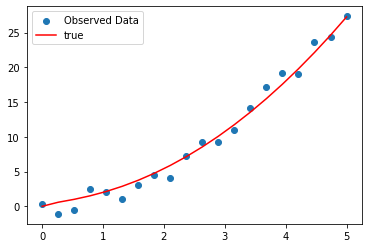

In [2]:
x_train=np.linspace(0,5,20)
def f(x):
    return x**2+np.sqrt(x)
y_train=f(x_train)+2*(-1+2*np.random.rand(20))

plt.scatter(x_train,y_train,label='Observed Data')
plt.plot(x_train,f(x_train),color='red',label='true')
plt.legend()

We wish to model this data via polynomial regression. First solving in the standard least squares approach,

In [3]:
M = x_train[:, np.newaxis]**[0,1,2]


In [4]:
p, res, rnk, s = lstsq(M, y_train)
print(s)
print("Sum of Squared Residuals is", round(res,2))


[53.57777828  4.16917035  1.24667565]
Sum of Squared Residuals is 18.36


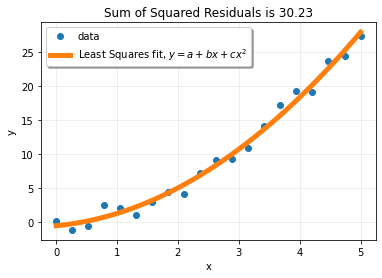

In [5]:
plt.plot(x_train, y_train, 'o', label='data')
xx = np.linspace(0, 5, 100)
yy = p[0] +p[1]*xx+p[2]*xx**2
plt.plot(xx, yy, label='Least Squares fit, $y = a+bx+cx^2$',lw=5)
plt.title('Sum of Squared Residuals is 30.23')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Keeping the same Loss function L2 norm but solving numerically via  gradient descent

In [6]:
M = x_train[:, np.newaxis]**[0,1,2]


In [24]:
def gradient_descent(x_train,y_train,learning_rate,max_iter=50000,tol=100):
    '''
    Given training data for feature matrix X and target vector y and a user-specified learning rate solve a least squares problem via gradient descent 
    
    '''
    w=np.random.rand(x_train.shape[1])
    
    for j in range (0,max_iter):
        pred=np.dot(x_train,w) # estiamted values
        l1_error=(y_train.T-pred) # l1 error for predictions
        l2_error=l1_error**2 # l2 error for predictions 
        
        # compute gradient of entire dataset
        # Note here the gradient is analytically known, written in matrix form
        gradient_scaler=(-2/x_train.shape[0])*np.sum(l1_error.reshape(-1,1)*x_train,axis=0) 
        
        # take orthogonal component 
        w=w-learning_rate*gradient_scaler
       
        if abs(np.sum(l2_error)) <tol:
            print("Min Tol Reached at ",j)
            return w,l2_error
        
    print("Max Iter reached")
    return w,l2_error

In [25]:
weights,error=gradient_descent(M,y_train,0.0001)
print("Weights Vector is", weights)
print("MSE is", np.sum(error))

Min Tol Reached at  18
Weights Vector is [0.68952905 0.38912851 0.84118154]
MSE is 97.28497644475539


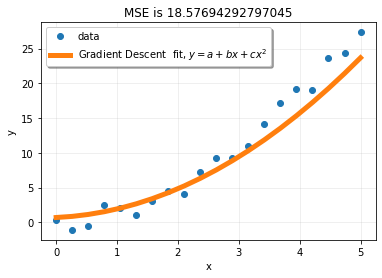

In [26]:
plt.plot(x_train, y_train, 'o', label='data')
xx = np.linspace(0, 5, 20)
yy = weights[0] +weights[1]*xx+weights[2]*xx**2
plt.plot(xx, yy, label='Gradient Descent  fit, $y = a+bx+cx^2$',lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('MSE is 18.57694292797045')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Now the comparisons in the MSE values

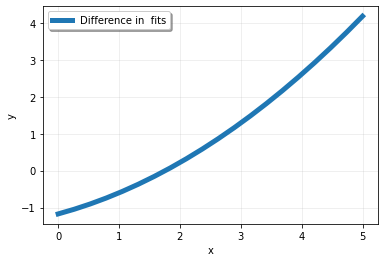

In [27]:

xx = np.linspace(0, 5, 20)
yyols = p[0] +p[1]*xx+p[2]*xx**2
yygd = weights[0] +weights[1]*xx+weights[2]*xx**2
plt.plot(xx, yyols-yygd, label='Difference in  fits',lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()